# EE2213 Project: Multi-Class Classification

#### <span style="color:red">No additional library imports are permitted.</span>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder

## PART 0: Data Loading and Preparation

In [39]:
def load_openml_dataset():

    dataset = fetch_openml(name='vehicle', version=1, as_frame=True, parser='auto')
    X = dataset.data.values
    
    target_values = dataset.target.values
    unique_targets = np.unique(target_values)
    
    # Create mapping from string labels to integers
    label_to_int = {label: i for i, label in enumerate(unique_targets)}
    y = np.array([label_to_int[label] for label in target_values])
    
    feature_names = dataset.feature_names
    
    return X, y, feature_names

X, y, feature_names = load_openml_dataset()
print(f"Feature shape: {X.shape}, target output shape:{y.shape}")
print(f"feature names: {feature_names}")


Feature shape: (846, 18), target output shape:(846,)
feature names: ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO']


## PART 1: Dataset Partition and One-hot Encoding

In [40]:
def dataset_partition_encoding(X, y):
    """
    Input type
    :X type: numpy.ndarray of size (number_of_samples, number_of_features)
    :y type: numpy.ndarray of size (number_of_samples,)

    Return type
    :X_train type: numpy.ndarray of size (number_of_training_samples, number_of_features)
    :X_val type: numpy.ndarray of size (number_of_validation_samples, number_of_features)
    :X_test type: numpy.ndarray of size (number_of_test_samples, number_of_features)
    :Ytr_onehot type: numpy.ndarray of size (number_of_training_samples, num_classes)
    :Yval_onehot type: numpy.ndarray of size (number_of_validation_samples, num_classes)
    :Yts_onehot type: numpy.ndarray of size (number_of_test_samples, num_classes)

    """

    # your code goes here
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=203)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=203)
    
    onehot_encoder = OneHotEncoder(sparse_output=False)
    reshaped = y_train.reshape(len(y_train), 1)
    Ytr_onehot = onehot_encoder.fit_transform(reshaped)
    reshaped = y_val.reshape(len(y_val), 1)
    Yval_onehot = onehot_encoder.fit_transform(reshaped)
    reshaped = y_test.reshape(len(y_test), 1)
    Yts_onehot = onehot_encoder.fit_transform(reshaped)


    # return in this order
    return X_train, X_val, X_test, Ytr_onehot, Yval_onehot, Yts_onehot

X_train, X_val, X_test, Ytr_onehot, Yval_onehot, Yts_onehot = dataset_partition_encoding(X, y)
print(f"Training set shape: {X_train.shape}, {Ytr_onehot.shape}")
print(f"Validation set shape: {X_val.shape}, {Yval_onehot.shape}")
print(f"Test set shape: {X_test.shape}, {Yts_onehot.shape}")

Training set shape: (507, 18), (507, 4)
Validation set shape: (169, 18), (169, 4)
Test set shape: (170, 18), (170, 4)


## PART 2: Feature Selection using Pearson Correlation

In [41]:

def feature_selection(X_train, X_val, X_test, feature_names, threshold=0.8):
    """
    Input type
    :X_train type: numpy.ndarray of size (number_of_training_samples, number_of_features)
    :X_val type: numpy.ndarray of size (number_of_validation_samples, number_of_features)
    :X_test type: numpy.ndarray of size (number_of_test_samples, number_of_features)
    :feature_names type: list of str
    :threshold type: float

    Return type
    :selected_features type: list of str
    :FS_X_train type: numpy.ndarray of size (number_of_training_samples, number_of_selected_features)
    :FS_X_val type: numpy.ndarray of size (number_of_validation_samples, number_of_selected_features)
    :FS_X_test type: numpy.ndarray of size (number_of_test_samples, number_of_selected_features)

    """

    # your code goes here
    df = pd.DataFrame(X_train.copy(), columns=feature_names)
    correlations = df.corr().abs()
    # print (correlations)
    
    selected_features = ["COMPACTNESS"]
    for feature in feature_names:
        if all(correlations.loc[feature, selected] <= threshold for selected in selected_features):
            selected_features.append(feature)
                
    indices = [feature_names.index(feat) for feat in selected_features]

    FS_X_train = X_train[:, indices]
    FS_X_val = X_val[:, indices]
    FS_X_test = X_test[:, indices]

    # return in this order
    return selected_features, FS_X_train, FS_X_val, FS_X_test

selected_features, FS_X_train, FS_X_val, FS_X_test = feature_selection(X_train, X_val, X_test, feature_names)

print(f"{len(selected_features)} Selected Features: {selected_features}")
print(f"Training set shape after feature selection: {FS_X_train.shape}, {Ytr_onehot.shape}")
print(f"Validation set shape after feature selection: {FS_X_val.shape}, {Yval_onehot.shape}")
print(f"Test set shape after feature selection: {FS_X_test.shape}, {Yts_onehot.shape}")


9 Selected Features: ['COMPACTNESS', 'CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR']
Training set shape after feature selection: (507, 9), (507, 4)
Validation set shape after feature selection: (169, 9), (169, 4)
Test set shape after feature selection: (170, 9), (170, 4)


## PART 3: Polynomial Feature Transformation and Classification

In [42]:

def polynomial_for_classification(FS_X_train, FS_X_val, FS_X_test, Ytr_onehot, Yval_onehot, Yts_onehot, max_order=3, lamda=0.001):
    """
    Args:
        FS_X_train (np.ndarray): Feature matrix for training.
        FS_X_val (np.ndarray): Feature matrix for validation.
        FS_X_test (np.ndarray): Feature matrix for testing.
        Ytr_onehot (np.ndarray): One-hot encoded labels for training.
        Yval_onehot (np.ndarray): One-hot encoded labels for validation.
        Yts_onehot (np.ndarray): One-hot encoded labels for testing.
        max_order (int): Maximum polynomial order to consider.
        lamda (float): Regularization strength.

    Returns:
        acc_train_list (list): Training accuracies for each polynomial order.
        acc_val_list (list): Validation accuracies for each polynomial order.
        best_order (int): Best polynomial order based on validation accuracy.
        acc_test (float): Test accuracy for the best polynomial order.

    """

    # your code goes here
    acc_train_list = []
    acc_val_list = []

    # Convert one-hot to class indices for accuracy computation
    ytr_true = np.argmax(Ytr_onehot, axis=1)
    yval_true = np.argmax(Yval_onehot, axis=1)
    yts_true = np.argmax(Yts_onehot, axis=1)

    best_idx = 0

    for order in range(1, max_order + 1):
        poly = PolynomialFeatures(order)
        P = poly.fit_transform(FS_X_train)  # includes column of 1s
        P_val = poly.transform(FS_X_val)

        # check if P^T * P is invertible (using determinant threshold)
        PtP = P.T @ P
        if np.linalg.matrix_rank(PtP) == PtP.shape[0]:
            # matrix is invertible: use ordinary least squares
            w = np.linalg.inv(PtP) @ P.T @ Ytr_onehot
        else:
            # matrix is not invertible: use ridge (L2) regularization
            I = np.identity(P.shape[1])
            w = np.linalg.inv(PtP + lamda * I) @ P.T @ Ytr_onehot

        # Predictions
        Ytr_est = P @ w
        Yval_est = P_val @ w

        # Class predictions
        Ytr_class = np.argmax(Ytr_est, axis=1)
        Yval_class = np.argmax(Yval_est, axis=1)

        # Accuracies
        acc_train = accuracy_score(ytr_true, Ytr_class)
        acc_val = accuracy_score(yval_true, Yval_class)

        acc_train_list.append(acc_train)
        acc_val_list.append(acc_val)

    # Select best order and compute test accuracy
    best_idx = int(np.argmax(acc_val_list))
    best_order = best_idx + 1  # because orders are 1..max_order

    # Recompute using the best order to evaluate on test set
    poly_best = PolynomialFeatures(best_order)
    P_best = poly_best.fit_transform(FS_X_train)
    P_test_best = poly_best.transform(FS_X_test)

    PtP_best = P_best.T @ P_best
    if np.linalg.matrix_rank(PtP_best) == PtP_best.shape[0]:
        w_best = np.linalg.inv(PtP_best) @ P_best.T @ Ytr_onehot
    else:
        I_best = np.identity(P_best.shape[1])
        w_best = np.linalg.inv(PtP_best + lamda * I_best) @ P_best.T @ Ytr_onehot

    Yts_best = P_test_best @ w_best
    Yts_class = np.argmax(Yts_best, axis=1)
    acc_test = accuracy_score(yts_true, Yts_class)

    # return in this order              
    return acc_train_list, acc_val_list, best_order, acc_test

acc_train_list, acc_val_list, best_order, acc_test = polynomial_for_classification(FS_X_train, FS_X_val, FS_X_test, Ytr_onehot, Yval_onehot, Yts_onehot)

print(f"Training accuracies: {np.round(acc_train_list,2)}")
print(f"Validation accuracies: {np.round(acc_val_list,2)}")
print(f"Best polynomial order: {best_order}")
print(f"Test accuracy for best order {best_order}: {np.round(acc_test,2)}")


Training accuracies: [0.72 0.81 0.93]
Validation accuracies: [0.77 0.8  0.77]
Best polynomial order: 2
Test accuracy for best order 2: 0.72


## PART 4: Multinomial Logistic Regression

Without Normalization
Training accuracies for different learning rates: [0.65 0.52 0.65 0.43]
Validation accuracies for different learning rates: [0.7  0.54 0.69 0.46]
Best learning rate: 0.0001
Test accuracy for best learning rate 0.0001: 0.65
With Z-score Standardization
Training accuracies for different learning rates: [0.51 0.68 0.74 0.74]
Validation accuracies for different learning rates: [0.56 0.73 0.78 0.76]
Best learning rate: 0.01
Test accuracy for best learning rate 0.01: 0.69


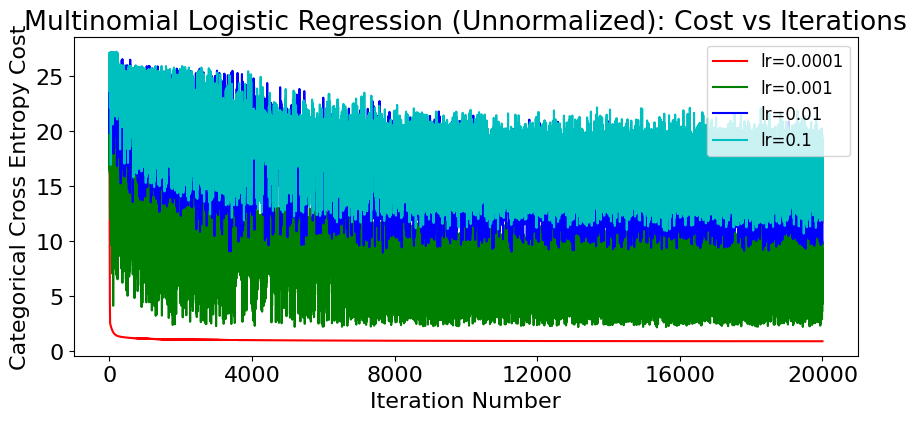

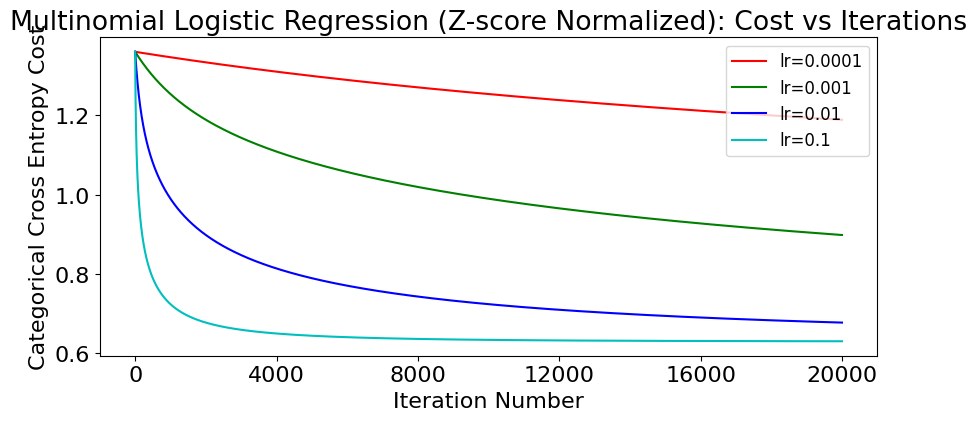

In [43]:
def MLR_select_lr(FS_X_train, FS_X_val, FS_X_test, Ytr_onehot, Yval_onehot, Yts_onehot, lr_list=[0.0001, 0.001, 0.01, 0.1], num_iters=20000):
    """
    Args:
        FS_X_train (np.ndarray): Feature matrix for training.
        FS_X_val (np.ndarray): Feature matrix for validation.
        FS_X_test (np.ndarray): Feature matrix for testing.
        Ytr_onehot (np.ndarray): One-hot encoded labels for training.
        Yval_onehot (np.ndarray): One-hot encoded labels for validation.
        Yts_onehot (np.ndarray): One-hot encoded labels for testing.
        lr_list (list): List of learning rates to test.
        num_iters (int): Number of iterations for training.

    Returns:
        cost_dict (dict): Dictionary of cost values for each learning rate without input normalization.
                          example: cost_dict = {0.0001: [0.1, 0.05, ...], 0.001: [0.09, 0.045, ...], ...}
        acc_train_list_Log (list): Training accuracies for each learning rate without input normalization.
        acc_val_list_Log (list): Validation accuracies for each learning rate without input normalization.
        best_lr (float): Best learning rate based on validation accuracy without input normalization.
        test_acc_Log (float): Test accuracy for the best learning rate without input normalization.
        cost_dict_norm (dict): Dictionary of cost values for each learning rate with input normalization.
        acc_train_list_Log_norm (list): Training accuracies for each learning rate with input normalization.
        acc_val_list_Log_norm (list): Validation accuracies for each learning rate with input normalization.
        best_lr_norm (float): Best learning rate based on validation accuracy with input normalization.
        test_acc_Log_norm (float): Test accuracy for the best learning rate with input normalization.

    """
    
    # your code goes here
    cost_dict = {}
    cost_dict_norm = {}
    acc_train_list_Log = []
    acc_val_list_Log = []
    acc_train_list_Log_norm = []
    acc_val_list_Log_norm = []
    max_val_acc = 0
    max_val_acc_norm = 0
    best_lr = 0
    best_lr_norm = 0

    # Polynomial mapping (order=1) adds bias column; use same mapping for both paths
    poly = PolynomialFeatures(1)
    X_train_poly = poly.fit_transform(FS_X_train)
    X_val_poly = poly.transform(FS_X_val)
    X_test_poly = poly.transform(FS_X_test)

    # Z-score normalization (fit on train), then apply same polynomial mapping
    scaler = StandardScaler()
    FS_X_train_norm = scaler.fit_transform(FS_X_train)
    FS_X_val_norm = scaler.transform(FS_X_val)
    FS_X_test_norm = scaler.transform(FS_X_test)

    X_train_poly_norm = poly.transform(FS_X_train_norm)
    X_val_poly_norm = poly.transform(FS_X_val_norm)
    X_test_poly_norm = poly.transform(FS_X_test_norm)

    n_features_with_bias = X_train_poly.shape[1]
    num_classes = Ytr_onehot.shape[1]

    for lr in lr_list:
        # Fixed seed for reproducibility; use identical initial weights for both paths
        np.random.seed(203)
        W0 = np.random.normal(0, 0.1, (n_features_with_bias, num_classes))
        W_un = W0.copy()
        W_norm = W0.copy()
        
        # Perform multinomial logistic regression for both unnormalized and normalized data
        W_opt, cost_vec, Ytr_est = multinomial_logistic_regression(X_train_poly, W_un, Ytr_onehot, lr, num_iters)
        W_opt_norm, cost_vec_norm, Ytr_est_norm = multinomial_logistic_regression(X_train_poly_norm, W_norm, Ytr_onehot, lr, num_iters)

        # Compute training and validation accuracies for unnormalized data
        ytr_true = np.argmax(Ytr_onehot, axis=1)
        train_acc = accuracy_score(ytr_true, np.argmax(Ytr_est, axis=1))
        Yval_est, _, _ = multi_logistic_cost_gradient(X_val_poly, W_opt, Yval_onehot)
        yval_true = np.argmax(Yval_onehot, axis=1)
        val_acc = accuracy_score(yval_true, np.argmax(Yval_est, axis=1))
        acc_train_list_Log.append(train_acc)
        acc_val_list_Log.append(val_acc)
        
        # Compute training and validation accuracies for normalized data
        train_acc_norm = accuracy_score(ytr_true, np.argmax(Ytr_est_norm, axis=1))
        Yval_est_norm, _, _ = multi_logistic_cost_gradient(X_val_poly_norm, W_opt_norm, Yval_onehot)
        val_acc_norm = accuracy_score(yval_true, np.argmax(Yval_est_norm, axis=1))
        acc_train_list_Log_norm.append(train_acc_norm)
        acc_val_list_Log_norm.append(val_acc_norm)

        # Store cost vectors for this learning rate
        cost_dict[lr] = cost_vec
        cost_dict_norm[lr] = cost_vec_norm
        
        # Check for best learning rate based on validation accuracy for unnormalized data
        if val_acc > max_val_acc:
            max_val_acc = val_acc
            best_lr = lr
            # Compute test accuracy for the best learning rate
            Ytest_est, _, _ = multi_logistic_cost_gradient(X_test_poly, W_opt, Yts_onehot)
            test_acc_Log = accuracy_score(np.argmax(Yts_onehot, axis=1), np.argmax(Ytest_est, axis=1))
            
        # Check for best learning rate based on validation accuracy for normalized data
        if val_acc_norm > max_val_acc_norm:
            max_val_acc_norm = val_acc_norm
            best_lr_norm = lr
            # Compute test accuracy for the best learning rate
            Ytest_est_norm, _, _ = multi_logistic_cost_gradient(X_test_poly_norm, W_opt_norm, Yts_onehot)
            test_acc_Log_norm = accuracy_score(np.argmax(Yts_onehot, axis=1), np.argmax(Ytest_est_norm, axis=1))
            
    # return in this order
    return cost_dict, acc_train_list_Log, acc_val_list_Log, best_lr, test_acc_Log, cost_dict_norm, acc_train_list_Log_norm, acc_val_list_Log_norm, best_lr_norm, test_acc_Log_norm



def multinomial_logistic_regression(X, W, Y, lr, num_iters):
    pred_Y, cost, gradient = multi_logistic_cost_gradient(X, W, Y)
    cost_vec = np.zeros(num_iters + 1)
    cost_vec[0] = cost

    for i in range (1, num_iters + 1):
        W -= lr * gradient
        pred_Y, cost, gradient = multi_logistic_cost_gradient(X, W, Y)
        cost_vec[i] = cost
    return W, cost_vec, pred_Y



def multi_logistic_cost_gradient(X, W, Y, eps=1e-15):
    z = X @ W
    z_max = np.max(z, axis=-1, keepdims=True)  # for numerical stability
    exp_z = np.exp(z - z_max)
    pred_Y = exp_z / np.sum(exp_z, axis=-1, keepdims=True)

    # Clip predictions to prevent log(0)
    pred_Y = np.clip(pred_Y, eps, 1 - eps)
    
    N = X.shape[0]  # Number of samples
    cost   = (np.sum(-(Y * np.log(pred_Y))))/N
    gradient = (X.T @ (pred_Y-Y))/N

    return pred_Y, cost, gradient



def cost_vs_iter_curve(cost_dict, cost_dict_norm):
    """
    Args:
        cost_dict (dict): Dictionary of cost values for each learning rate without input normalization.
        cost_dict_norm (dict): Dictionary of cost values for each learning rate with input normalization.

    """

    # your code goes here
    plt.figure(1, figsize=[9,4.5])
    plt.rcParams.update({'font.size': 16})
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    # Determine max number of iterations from provided cost vectors
    if len(cost_dict) > 0:
        max_len_unnorm = max(len(cv) for cv in cost_dict.values())
        xs_full_unnorm = np.arange(0, max_len_unnorm, 1)
        for i, (lr, cost_vec) in enumerate(sorted(cost_dict.items(), key=lambda t: t[0])):
            c = colors[i % len(colors)]
            xs = xs_full_unnorm[:len(cost_vec)]
            plt.plot(xs, cost_vec, color=c, label=f'lr={lr}')
        plt.legend(loc='upper right', fontsize=12)
        plt.xlabel('Iteration Number')
        plt.ylabel('Categorical Cross Entropy Cost')
        step = max(1, (max_len_unnorm-1)//5)
        plt.xticks(np.arange(0, max_len_unnorm, step))
        plt.title('Multinomial Logistic Regression (Unnormalized): Cost vs Iterations')
        plt.tight_layout()

    # Second figure for normalized
    plt.figure(2, figsize=[9,4.5])
    if len(cost_dict_norm) > 0:
        max_len_norm = max(len(cv) for cv in cost_dict_norm.values())
        xs_full_norm = np.arange(0, max_len_norm, 1)
        for i, (lr, cost_vec) in enumerate(sorted(cost_dict_norm.items(), key=lambda t: t[0])):
            c = colors[i % len(colors)]
            xs = xs_full_norm[:len(cost_vec)]
            plt.plot(xs, cost_vec, color=c, label=f'lr={lr}')
        plt.legend(loc='upper right', fontsize=12)
        plt.xlabel('Iteration Number')
        plt.ylabel('Categorical Cross Entropy Cost')
        step = max(1, (max_len_norm-1)//5)
        plt.xticks(np.arange(0, max_len_norm, step))
        plt.title('Multinomial Logistic Regression (Z-score Normalized): Cost vs Iterations')
        plt.tight_layout()
    



cost_dict,acc_train_list_Log, acc_val_list_Log, best_lr,test_acc_Log, cost_dict_norm, acc_train_list_Log_norm, acc_val_list_Log_norm, best_lr_norm, test_acc_Log_norm = MLR_select_lr(FS_X_train, FS_X_val, FS_X_test, Ytr_onehot, Yval_onehot, Yts_onehot)

print(f"Without Normalization")
print(f"Training accuracies for different learning rates: {np.round(acc_train_list_Log,2)}")
print(f"Validation accuracies for different learning rates: {np.round(acc_val_list_Log,2)}")
print(f"Best learning rate: {best_lr}")
print(f"Test accuracy for best learning rate {best_lr}: {np.round(test_acc_Log,2)}")


print(f"With Z-score Standardization")
print(f"Training accuracies for different learning rates: {np.round(acc_train_list_Log_norm,2)}")
print(f"Validation accuracies for different learning rates: {np.round(acc_val_list_Log_norm,2)}")
print(f"Best learning rate: {best_lr_norm}")
print(f"Test accuracy for best learning rate {best_lr_norm}: {np.round(test_acc_Log_norm,2)}")

cost_vs_iter_curve (cost_dict, cost_dict_norm)

### Analysis of Effect of Normalization Based on Your Results

### Effect of Z-score Normalization on Multinomial Logistic Regression

Theory: We learnt that normalisation across samples for each feature, such as using Z-score standardisation, ensures each feature contributes fairly across samples and across features, improving optimization stability and speed for a stable and proper regression model.

Numerics: In this project, we perform multinomial logistic regression (with softmax + cross-entropy) on the OpenML “vehicle” dataset using two pipelines: raw features vs z-score normalized features (fit on train, applied to val/test, with mean = 0 and standard deviation = 1).

#### Graph Analysis
At one glance, the unnormalized run behaves erratically while the normalized run is smooth and fast.

Unnormalized plot:
  - lr=0.0001 (red) plunges almost immediately to a low cost and stays flat.
  - lr=0.001 (green), 0.01 (blue), 0.1 (cyan) show large, jagged cost oscillations; they never settle within 20k iterations.
  - Initial cost is far above ln(4)≈1.386. 

Z-score normalized plot:
  - lr=0.1 (cyan) drops the fastest and converges near 0.6 within 20k iterations.
  - lr=0.01 (blue) is smooth and keeps dropping, ending around 0.7 and still improving.
  - lr=0.001 (green) and lr=0.0001 (red) descend slowly and haven’t converged by 20k, but is stable unlike the unnormalised counterparts.
  - All curves start near ln(4)≈1.386.

#### Why unnormalized behaves badly: 
- Heterogeneous scales across features: Some vehicle attributes have much larger numerical ranges/variance than others. With raw features, a single global learning rate is simultaneously too big for high-variance columns and too small for low-variance ones.
- Ill-conditioned loss surface: The curvature (roughly tied to X^T X) is highly skewed. Gradient descent zig-zags along steep directions when the step is even modestly large (lr >= 0.001), causing the “jaggies”.
- Saturated logits at initialization: With K=4 classes, a uniform softmax gives p=1/4, so cross-entropy = −log(1/4) = ln(4) ≈ 1.386. This is the baseline loss when logits are small and symmetric. However, differing raw feature scales can produce large initial logits (z = XW), yielding extreme, confident but often wrong probabilities and therefore very large cross‑entropy (clipped but still large). 
- Gradient dominance: A few high-scale features and samples dominate updates, so successive steps overcorrect different directions and the trajectory becomes noisy.

#### Why normalization helps:
-  Per-feature Z‑score standardization (on train and used for val/test) gives mean‑0, variance‑1 features.
  - Within-feature fairness across samples: individual samples with large raw values no longer dominate that feature’s gradient; each sample contributes comparably for that feature.
  - Across-feature fairness: columns are on comparable scales, so one learning rate works across all weights.
- Result: A much better conditioned problem. The optimiser can take larger, safer steps, producing smooth curves and faster descent (lr=0.1 becomes stable and best in our run).

#### Conclusion: Numerics are consistent with theory (using the graphs):
- For this dataset, the normalized pipeline tolerates much larger learning rates (e.g., 0.1) and converges faster than the unnormalized pipeline.
  - Unnormalized pipeline: Expect unstable, slower training and a higher final loss (from the only lr=0.0001 that behaves stably) than the normalized best.
  - Normalized pipeline: Allows fast training at lr=0.1, under 20k iterations; lr=0.01 is also safe and may reach similar loss with more iterations.
- We can conclude that normalization “ensures each feature contributes fairly across samples and across features,” which is exactly what the two figures demonstrate.
